In [1]:
from plot_function import *
import pandas as pd
import sqlite3

In [2]:
connection = sqlite3.connect('./sample_database.db')
c = connection.cursor()

In [3]:
flow_curves = pd.read_sql_query("""
                    SELECT flow_curves.*, frq_sweep_info.elastic_modulus,
                    dilution_series.*, sample_prep_info.*, solvent_infos.*, tc_fit_results.*
                    FROM flow_curves
                    LEFT JOIN frq_sweep_info
                    ON ((flow_curves.sample_ID = frq_sweep_info.sample_ID) AND (flow_curves.temperature = frq_sweep_info.temperature))
                    LEFT JOIN dilution_series 
                    ON (flow_curves.sample_ID = dilution_series.sample_ID)
                    LEFT JOIN sample_prep_info
                    ON (flow_curves.sample_ID = sample_prep_info.sample_ID)
                    LEFT JOIN tc_fit_results
                    ON ((flow_curves.sample_ID = tc_fit_results.sample_ID) AND ((flow_curves.temperature = tc_fit_results.temperature)))
                    LEFT JOIN solvent_infos
                    ON ((sample_prep_info.solvent = solvent_infos.solvent) AND (flow_curves.temperature = solvent_infos.temperature))
                    WHERE dilution_serie = 'carbopol~974p~in~propylenglycol'
                  """, con=connection)

In [4]:
flow_curves = flow_curves.loc[:, ~flow_curves.columns.duplicated(keep='first')]
flow_curves.dilution_serie.unique()

array(['carbopol~974p~in~propylenglycol'], dtype=object)

In [5]:
flow_curves_concentration = flow_curves[flow_curves.temperature == 20]
flow_curves_T = flow_curves[flow_curves.w_percent == 1.9]

dict_colors = {10: '#3a4cbf', 15: '#6281e9', 20: '#629ae9',
               25: '#b7cff7', 30:'#dbdbdb', 35: '#f3c3ab', 
               40: '#f39779', 45: '#db5e4a', 50: '#b30426'
                }

# Plot Master curve

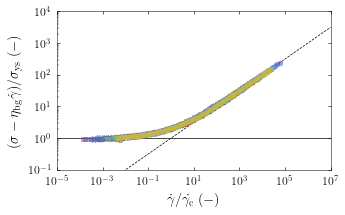

In [31]:
fig, ax, color, marker = create_plot()

flow_curves_concentration = flow_curves_concentration.sort_values('w_percent', ascending=False)

x = np.logspace(-6, 7, 30)

ax.plot(x, np.sqrt(x), marker='', ls='--', c='k')
ax.axhline(1, ls='-', c='k', marker='')

for T, dfg in flow_curves_T.groupby('temperature'):
    ax.loglog(dfg.shear_rate / dfg.caract_shear_rate,
                  (dfg.shear_stress - dfg.viscinf * dfg.shear_rate )/ dfg.yield_stress_TC, c=dict_colors[T], mfc=dict_colors[T], marker=next(marker),
                  alpha=0.5, label=f'{T}')

for wp, dfg in flow_curves_concentration.groupby('w_percent', sort=False):

    if wp > 1.77:
        c = next(color)
        ax.loglog(dfg.shear_rate / dfg.caract_shear_rate,
                  (dfg.shear_stress - dfg.viscinf * dfg.shear_rate )/ dfg.yield_stress_TC, c=c, mfc=c, marker=next(marker),
                  alpha=0.5, label=f'${wp}$')
    
        

        

ax.set(xlim=[1e-5, 1e7], ylim=[0.1, 1e4], 
       #xticks=[1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100, 1000],
       xlabel='$\dot{\gamma} / \dot{\gamma_\mathrm{c}}~(-)$', 
       ylabel='$(\sigma - \eta_\mathrm{bg} \dot{\gamma} ) / \sigma_\mathrm{ys}~(-)$');

fig.savefig('./figures/first_master_curve.svg')
        

3.0
2.7
2.0
1.9
1.85
1.8
1.78
1.75
1.7
1.5
1.3


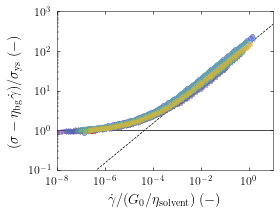

In [11]:
fig, ax, color, marker = create_plot(figsize=(4.2, 3.4))

flow_curves_concentration = flow_curves_concentration.sort_values('w_percent', ascending=False)

x = np.logspace(-8, 1, 30)

ax.plot(x, 150*np.sqrt(x), marker='', ls='--', c='k')
ax.axhline(1, ls='-', c='k', marker='')

for T, dfg in flow_curves_T.groupby('temperature'):
    ax.loglog(dfg.shear_rate / (dfg.elastic_modulus / dfg.solvent_viscosity),
                  (dfg.shear_stress - dfg.viscinf * dfg.shear_rate )/ dfg.yield_stress_TC, c=dict_colors[T], mfc=dict_colors[T], marker=next(marker),
                  alpha=0.5, label=f'{T}')

for wp, dfg in flow_curves_concentration.groupby('w_percent', sort=False):

    if wp > 1.77:
        c = next(color)
        ax.loglog(dfg.shear_rate / (dfg.elastic_modulus / dfg.solvent_viscosity),
                  (dfg.shear_stress - dfg.viscinf * dfg.shear_rate )/ dfg.yield_stress_TC, c=c, mfc=c, marker=next(marker),
                  alpha=0.5, label=f'${wp}$')
    
        

        

ax.set(xlim=[1e-8, 1e1], ylim=[0.1, 1e3], 
       #xticks=[1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100, 1000],
       xlabel='$\dot{\gamma} / (G_\mathrm{0} / \eta_\mathrm{solvent})~(-)$', 
       ylabel='$(\sigma - \eta_\mathrm{bg} \dot{\gamma} ) / \sigma_\mathrm{ys}~(-)$');

fig.savefig('./figures/second_master_curve.svg')
        